In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Avocado.csv', index_col='Unnamed: 0')
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


14 Features with 18249 observations

no NAN values

# EDA

# Categorical features

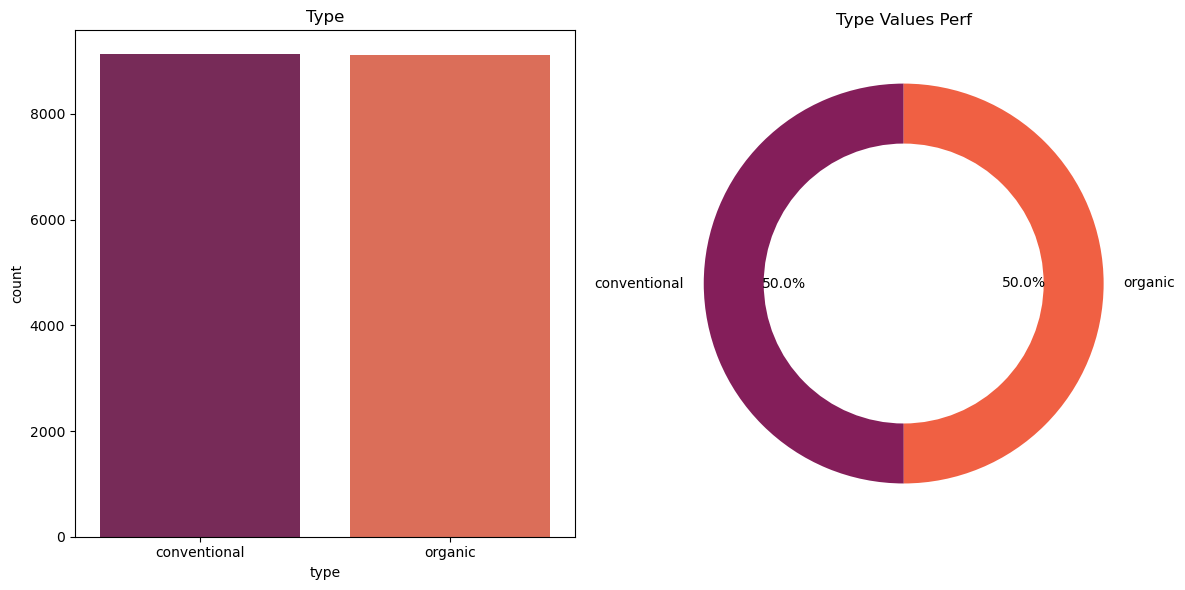

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='type', data=data, ax=ax[0], palette='rocket')
ax[0].set_title('Type')
colors = sns.color_palette('rocket', n_colors=data['type'].nunique())
risk_counts = data['type'].value_counts()
ax[1].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Type Values Perf')
plt.tight_layout()
plt.show()

In [5]:
data.type.value_counts(dropna=False)

type
conventional    9126
organic         9123
Name: count, dtype: int64

 The distribution of conventional and organic avocados are equally distributed.

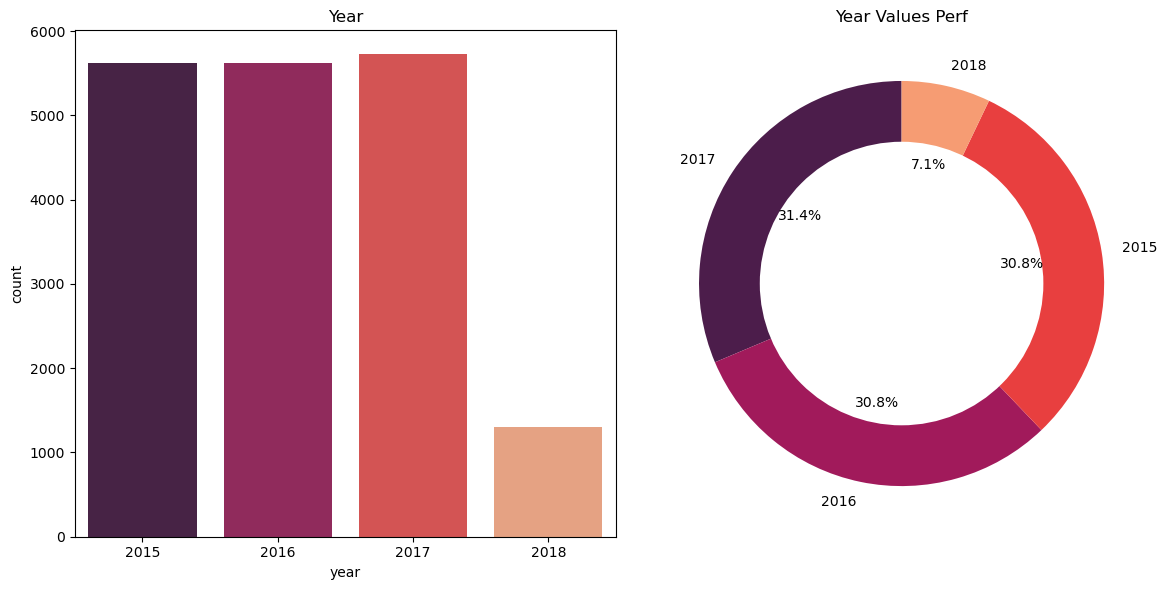

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='year', data=data, ax=ax[0], palette='rocket')
ax[0].set_title('Year')
colors = sns.color_palette('rocket', n_colors=data['year'].nunique())
risk_counts = data['year'].value_counts()
ax[1].pie(risk_counts, labels=risk_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Year Values Perf')
plt.tight_layout()
plt.show()

The number of avocados in 2017 is the highest compared to other years (with 31.36%).

However, the number of avocados in 2018 is the lowest, only 7.10%.

Region

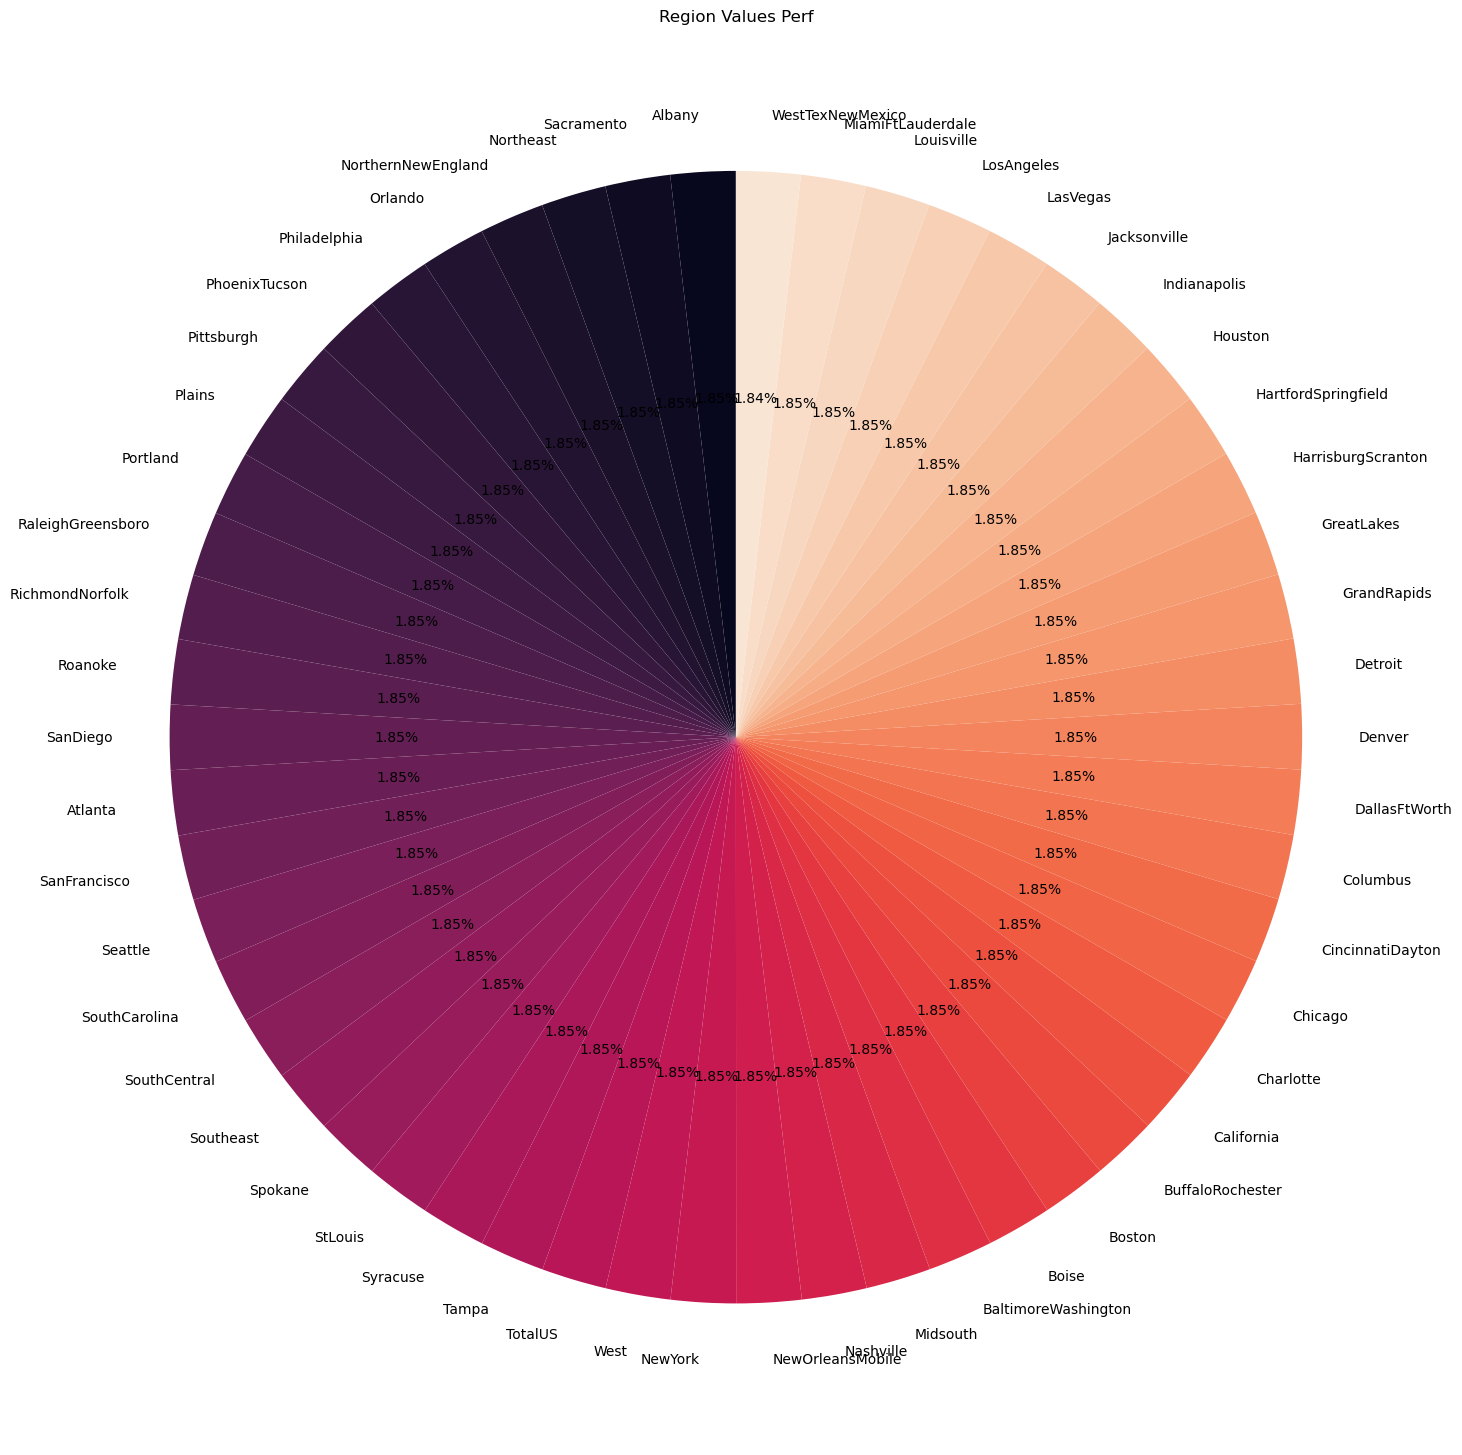

In [7]:
plt.figure(figsize=(15, 15))
colors = sns.color_palette('rocket', n_colors=data['region'].nunique())
risk_counts = data['region'].value_counts()
plt.pie(risk_counts, labels=risk_counts.index, autopct='%.2f%%', startangle=90, colors=colors)
plt.title('Region Values Perf')
plt.tight_layout()
plt.show()

In [8]:
data.region.value_counts(dropna=False)

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

The number of avocados from various regions are equally distributed (with percentage of 1.85%).

However, in WestTexNewMexico, the number of avocados slightly lower (335 avocados).

Region with the most sales

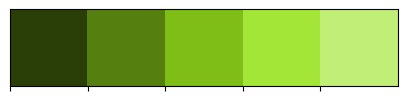

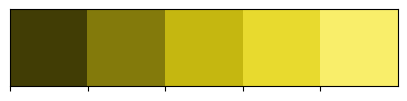

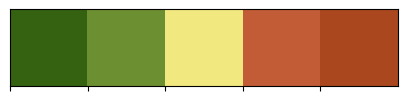

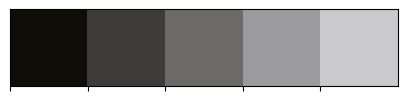

In [9]:
# --- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

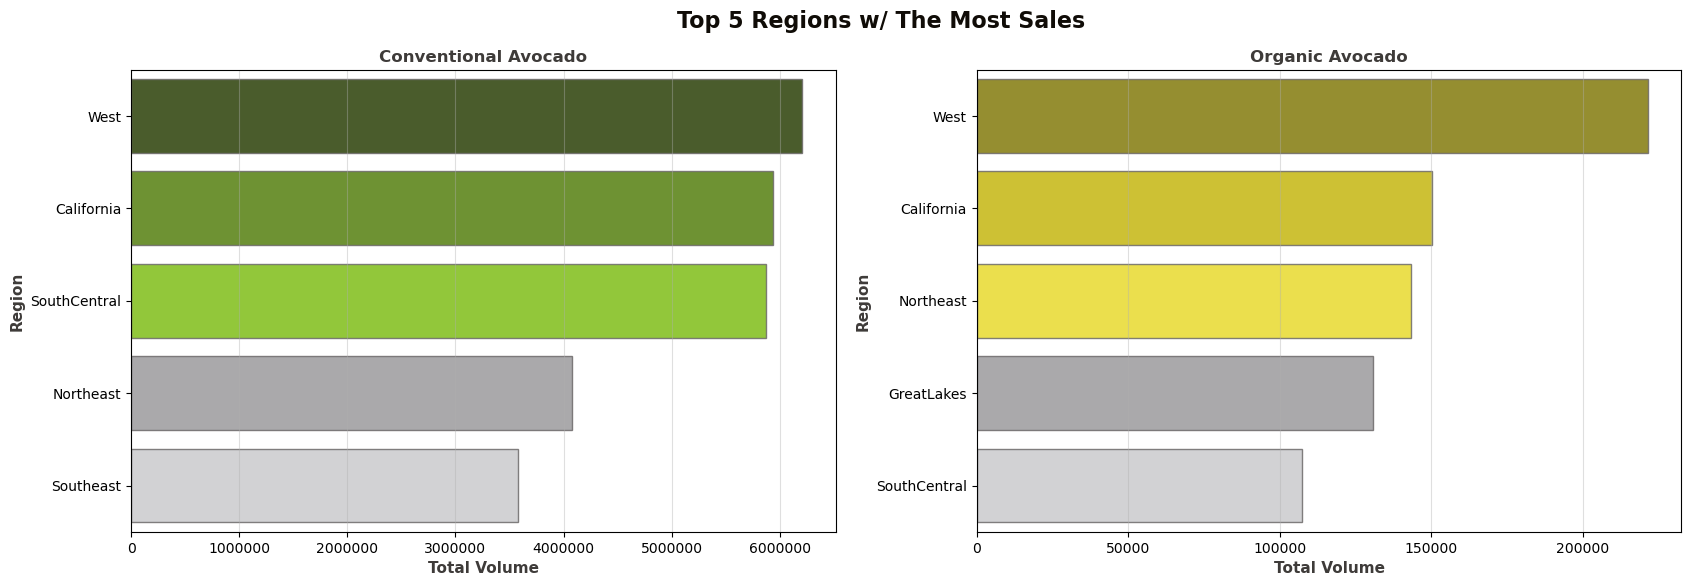

In [10]:
reg_conv = data[["region",'Total Volume']][data.type =='conventional']
reg_conv = reg_conv[reg_conv['region'] != 'TotalUS']
reg_conv = reg_conv.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume', ascending = False).iloc[:5]

reg_org = data[["region",'Total Volume']][data.type == 'organic']
reg_org = reg_org[reg_org['region'] != 'TotalUS']
reg_org = reg_org.groupby(['region']).aggregate({'Total Volume': np.mean}).sort_values(by = 'Total Volume', ascending = False).iloc[:5]

fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ The Most Sales', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif',
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(x='Total Volume', y = reg_conv.index, data = reg_conv, palette = black_grad, edgecolor = black_grad[2], 
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(x='Total Volume', y = reg_org.index, data = reg_org, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0)
plt.grid(axis = 'x', alpha = 0.4)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()



From bar charts above, conventional avocado has highest sales compared to organic avocados.

In conventional avocado, the highest sales is above 6.000.000, while the highest sales in organic avocado is only above 200.000 (the sales difference is about 5.800.000).

 Both West and California have the highest number of avocado sold in both types. With West in 1st position and California in 2nd position for both avocado types.
 
 It also can be seen that conventional avocados in South Central are popular (in 3rd place) compared to organic avocados (in 5th place).
 Otherwise, in North East, organic avocados very popular (in 3rd place) compared to conventional avocados (in 5th place).

Top region with highest prices

In [11]:
conv_pri = data[['region', 'AveragePrice']][data.type == 'conventional']
conv_pri = conv_pri.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice', 
                                                                                 ascending = False).iloc[:5]

org_pri = data[['region', 'AveragePrice']][data.type == 'organic']
org_pri = org_pri.groupby(['region']).aggregate({'AveragePrice': np.mean}).sort_values(by = 'AveragePrice',
                                                                                 ascending = False).iloc[:5]

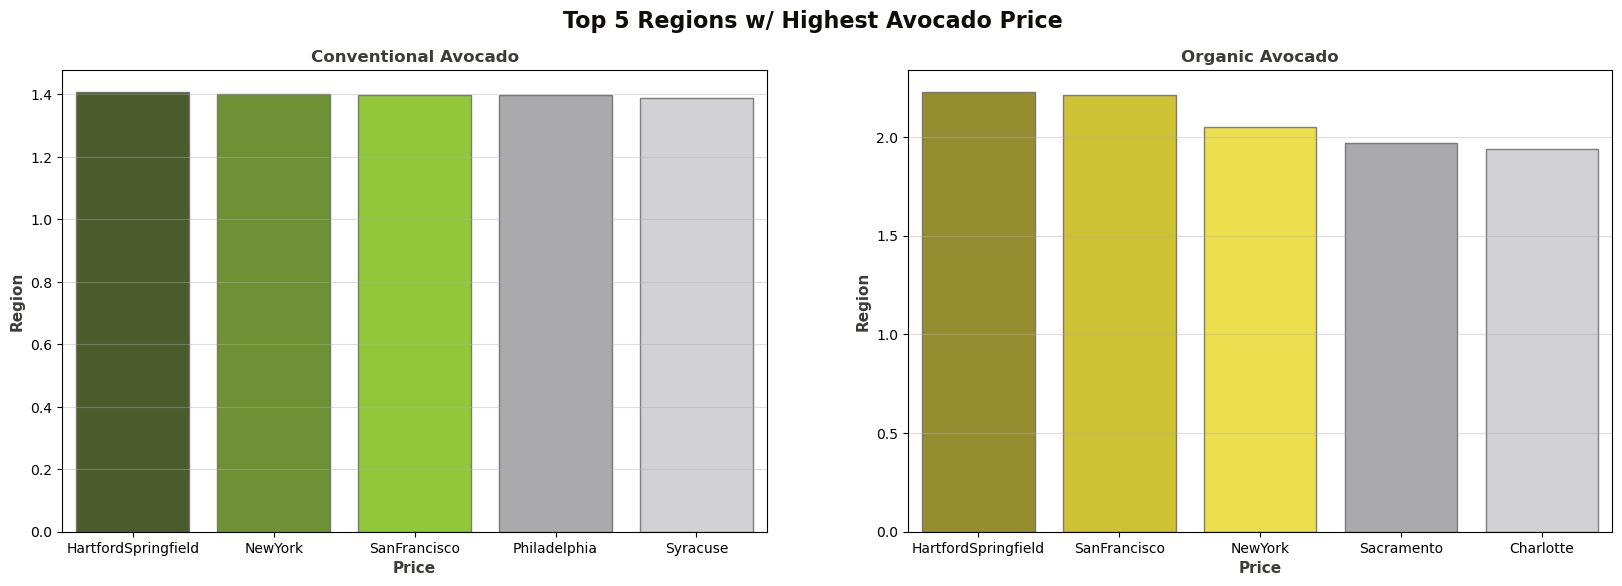

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle('Top 5 Regions w/ Highest Avocado Price', fontweight = 'heavy', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight = 'bold', fontsize = 12, fontfamily = 'sans-serif', color = black_grad[1])
bar_left = sns.barplot(y = 'AveragePrice', x = conv_pri.index, data = conv_pri, palette = black_grad, edgecolor = black_grad[2],
                       alpha = 0.85)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', color = black_grad[1])
bar_right = sns.barplot(y='AveragePrice', x = org_pri.index, data = org_pri, palette = black_grad, edgecolor = black_grad[2],
                        alpha = 0.85)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Region', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

 In general, it can be seen that organic avocados are more expensive compared to conventional avocados.

 The price differences in conventional avocados are very small compared to organic avocados, which indicates that distribution of conventional avocados price is almost the same in every region.

 Both Hartford Springfield, New York, and San Francisco always become regions with highest avocado prices. In addition, Hartford Springfield is in the 1st position for both conventional and avocado types.
 
 However, for New York and San Francisco positions are different in conventional and organic avocado types. In conventional avocados, New York placed 2nd, while in organic avocados, New York placed 3rd. Similarly in San Francisco, the positions of San Francisco in conventional avocados is in the 3rd place, while in organic avocados, San Francisco placed 2nd.

Avocado type on PLU

In [13]:
typ_plu = data[["type","4046","4225",'4770']]
typ_plu = typ_plu.groupby(["type"]).aggregate({"4046":np.mean, "4225":np.mean, "4770":np.mean})

In [14]:
typ_plu

,4046,4225,4770
type,,,
conventional,578611.649925,574805.318859,45405.796798
organic,7311.281600,15411.857724,266.254582


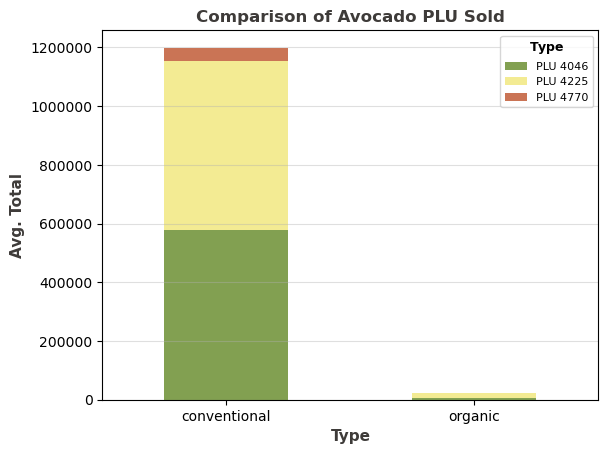

In [15]:
typ_plu.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Comparison of Avocado PLU Sold', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', 
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['PLU 4046','PLU 4225', 'PLU 4770'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

the total avocado sold in terms of labels PLU in general is much higher in conventional than in organic.

in Conventional PLU 4046 shares the same amount of total average with the PLU 4225. However, the amount of 4770 is not as much as the two ones

in Organic, the leading in avg total is PLU 4225 followed by PLU 4046

BAG_SIZE

In [16]:
typ_bags = data[["type","Small Bags","Large Bags",'XLarge Bags']]
typ_bags = typ_bags.groupby(["type"]).aggregate({"Small Bags":np.mean, "Large Bags":np.mean, 'XLarge Bags':np.mean})

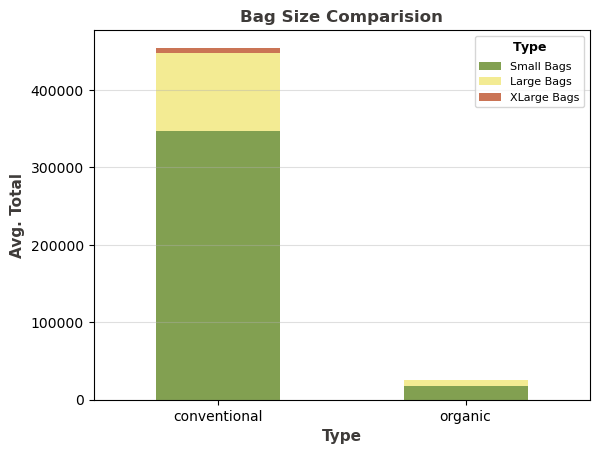

In [17]:
typ_bags.plot(kind='bar', stacked = True, color = color_mix[-4:-1], alpha = 0.85)
plt.title('Bag Size Comparision', fontweight = 'bold', fontsize = '12', fontfamily = 'sans-serif', 
          color = black_grad[1])
plt.xlabel('Type', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Avg. Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ["Small Bags","Large Bags",'XLarge Bags'], title = '$\\bf{Type}$', fontsize = '8', title_fontsize = '9',
           loc = 'upper right', frameon = True)
plt.xticks(rotation = 0)
plt.ticklabel_format(style = 'plain', axis = 'y')

the number of samll bags in both Avocado type is the highest.

Followed by, it's the number of large bags and the least of Xlagre Bags in conventional type

# Numerical

In [18]:
data[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


 From the descriptive statistics, it can be seen that Average Price is lack of variation.

 Furthermore, it can be seen that the rest of the columns have more variation.
 
 Low standard deviation means data are clustered around the mean (lack of variation), and high standard deviation indicates data are more spread out (more variation).

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


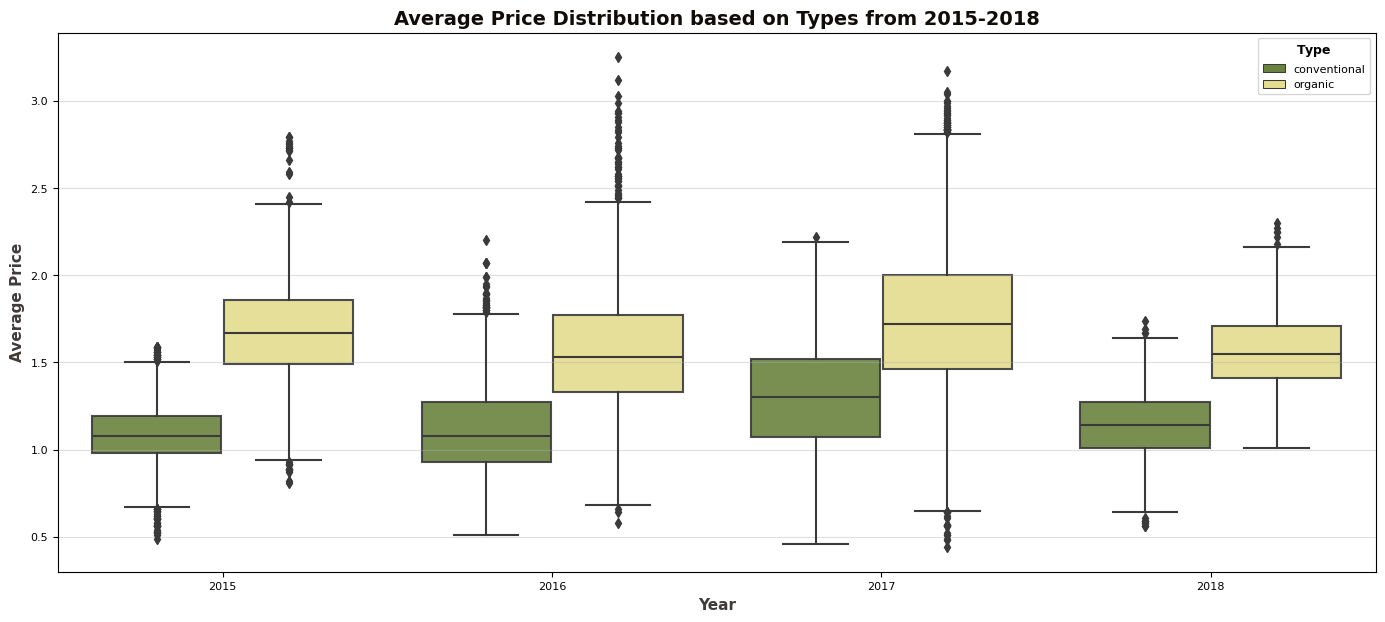

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = data, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

As it have been mentioned before, the price of ORGANIC avocado is much higher than the price of CONVENTIONAL one

 In general, the price distribution for both avocado types decreased in 2016, then reached its peak 2017 and finally declined again in 2018.
 
 The highest price of an organic avocado was in 2016, while the cheapest price was in 2017. Meanwhile for conventional avocado, the most expensive price were in 2016 and 2017, while the cheapest price was in 2017 too.

Scatter plot with avg price and total bags

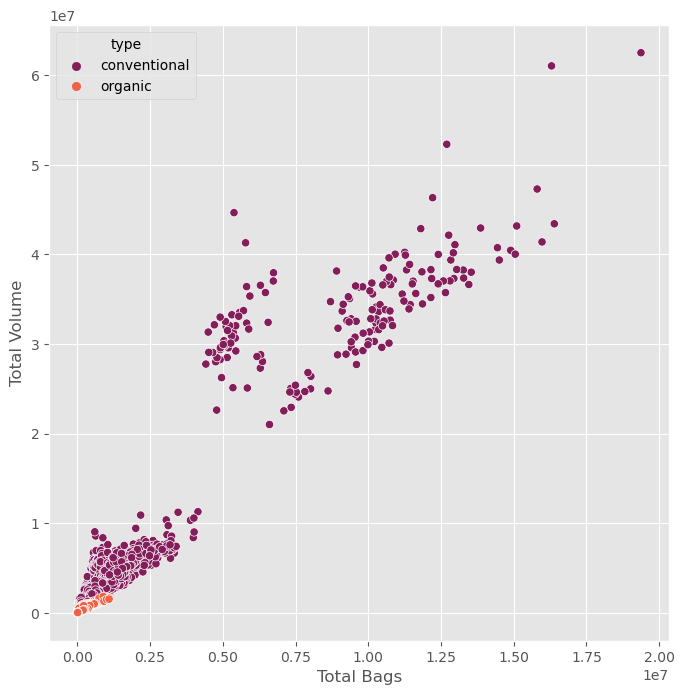

In [21]:
plt.figure(figsize=(8, 8))
plt.style.use('ggplot')

sns.scatterplot(
    y='Total Volume', 
    x='Total Bags', 
    data=data, 
    hue='type', 
    palette='rocket', 
    marker='o'
)

plt.show()

In general, it can be seen that the scatter plot clearly shows heteroscedasticity, since the variable values increases, the distribution/residual variance also increases until form a cone shape.

 From this plot, it can be concluded that if the total avocado sold for both types increases, then the total bags also increases.
 
 The distribution for organic avocados relatively lower and congregate at the same spot compared to conventional avocados which more spread out.

Time series plot

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

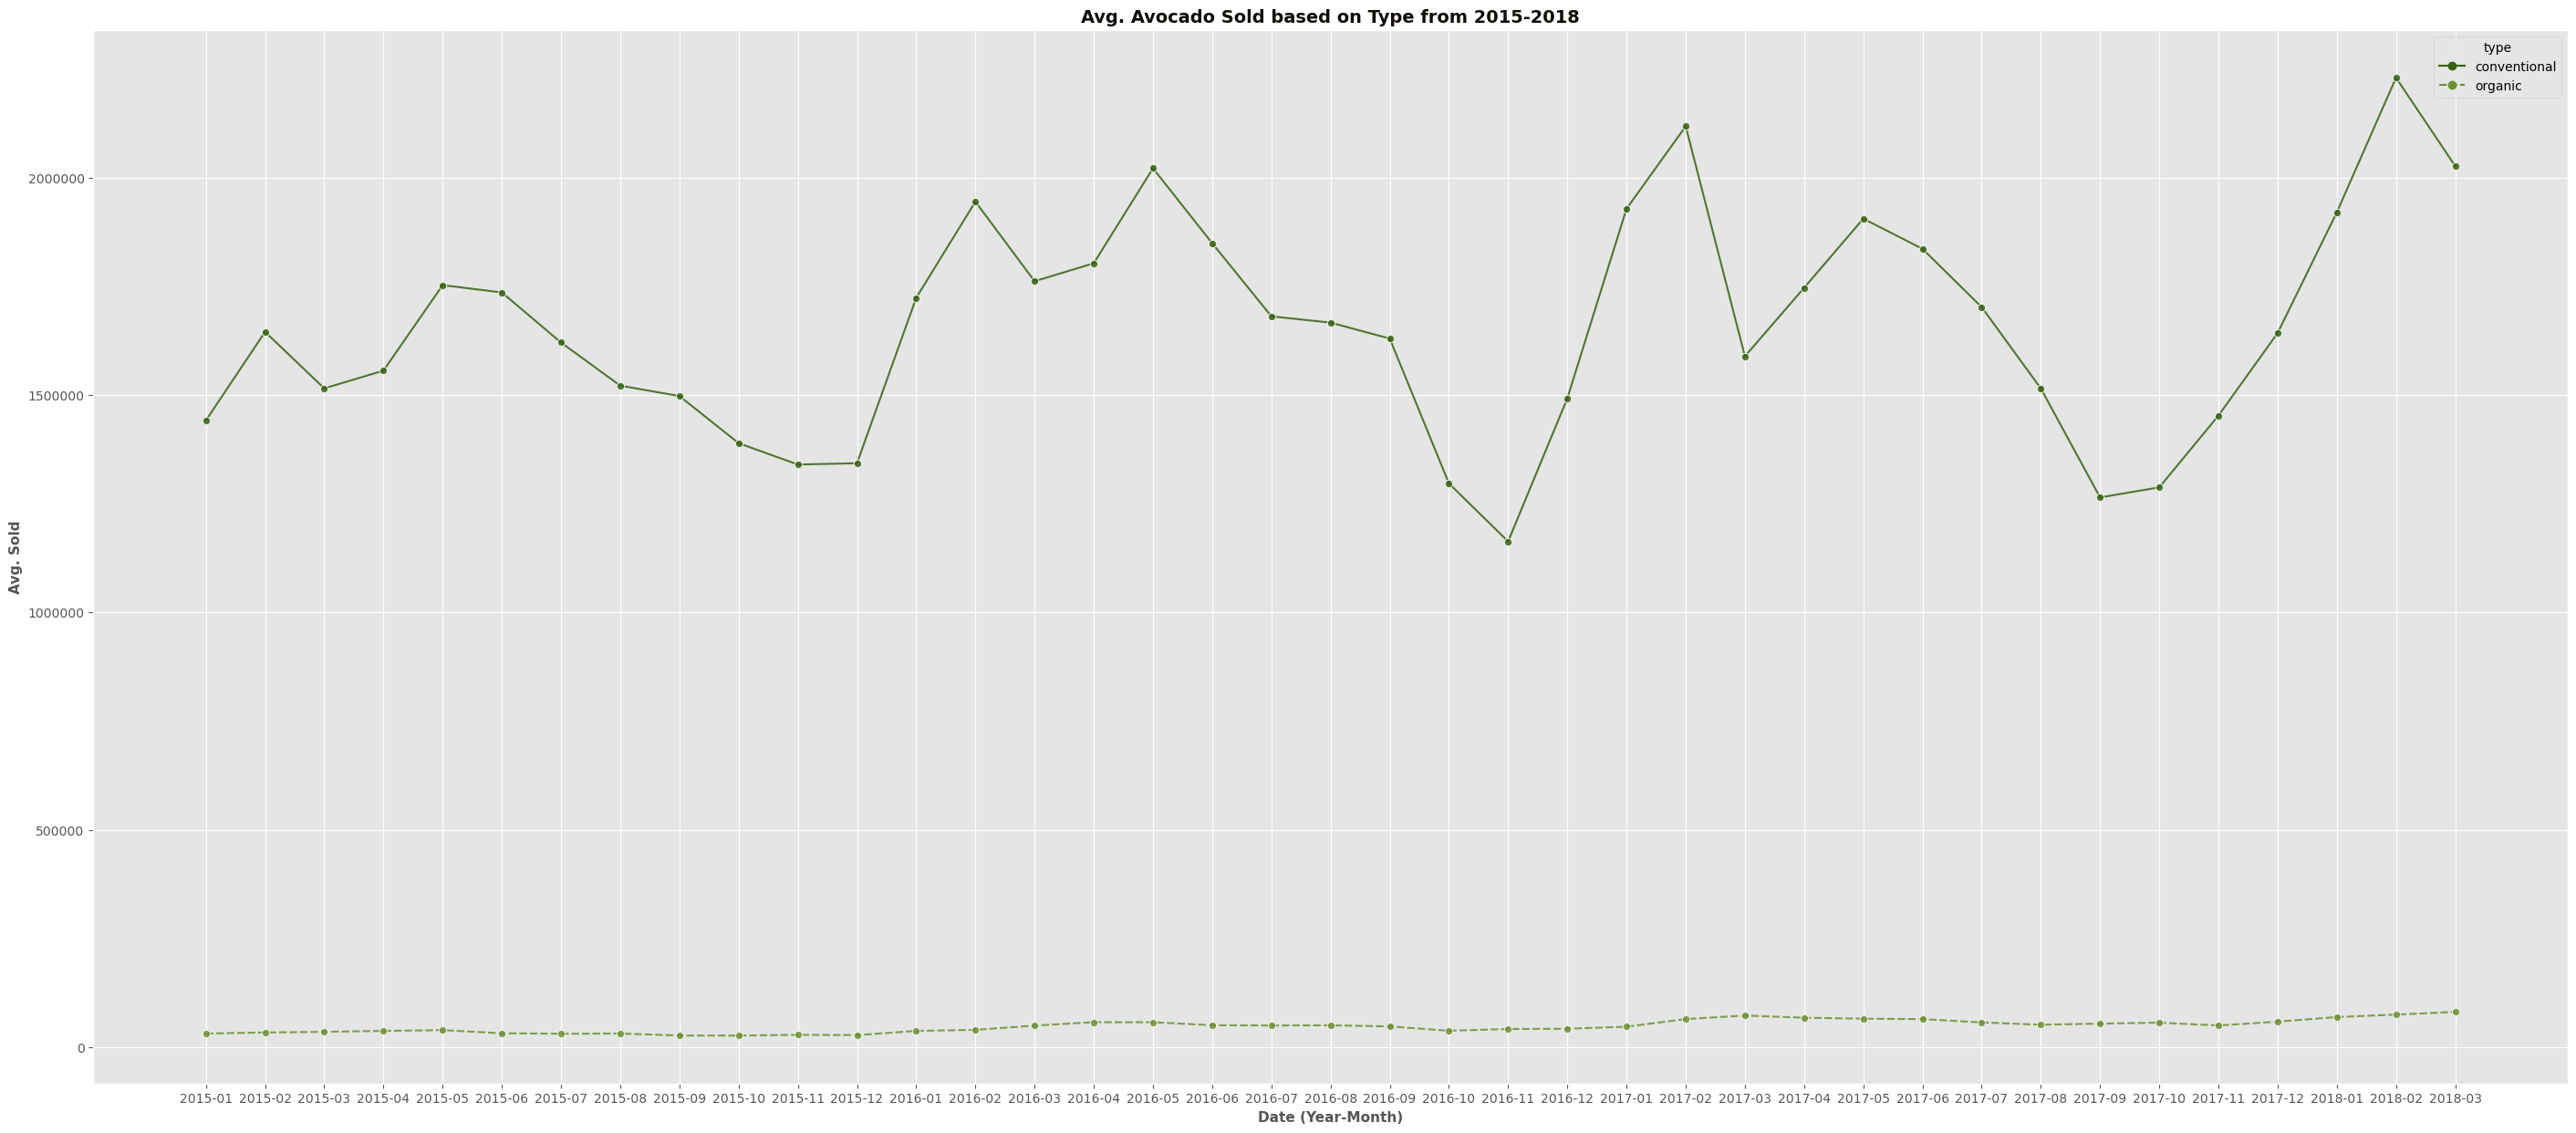

In [22]:
time_ser = data[["Date","Total Volume",'type']]
time_ser['Date'] = pd.DatetimeIndex(time_ser['Date'])
time_ser['Date'] = time_ser['Date'].apply(lambda x: x.strftime("%Y-%m"))
time_ser_grp = time_ser.groupby(["Date","type"])
time_ser_grp_month = time_ser_grp.aggregate({"Total Volume":np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (35, 15))
plt.title('Avg. Avocado Sold based on Type from 2015-2018', fontweight = 'bold', fontsize = 14,
          fontfamily = 'sans-serif', color = black_grad[0])
sns.lineplot(data = time_ser_grp_month, x = 'Date', y = 'Total Volume', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = color_mix[0:2], alpha = 0.85)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Avg. Sold', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(rotation = '45', fontsize = 7)
plt.grid(axis='y', alpha = 0.5, lw = 0.6)
plt.grid(axis='x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, frameon=True)

 As previously mentioned in previous EDA, conventional avocado has highest sales compared to organic avocados.

 In further analysis, it can be seen that at the end of the year until February the beginning of the following year there is an upward trend in conventional avocado sales. The highest sales of conventional avocado was in February 2018 while the lowest sales was in November 2016.

However, there is no significant increase or decrease in organic avocado sales from 2015 until beginning of 2018.

In [ ]:
time_ser2 = data[["Date",'AveragePrice','type']]
time_ser2['Date'] = pd.DatetimeIndex(time_ser2['Date'])
time_ser2['Date'] = time_ser2['Date'].apply(lambda x: x.strftime("%Y-%m"))
time_ser_grp2 = time_ser2.groupby(["Date","type"])
time_ser_grp_month2 = time_ser_grp2.aggregate({"AveragePrice":np.mean})

ValueError: rotation must be 'vertical', 'horizontal' or a number, not 90

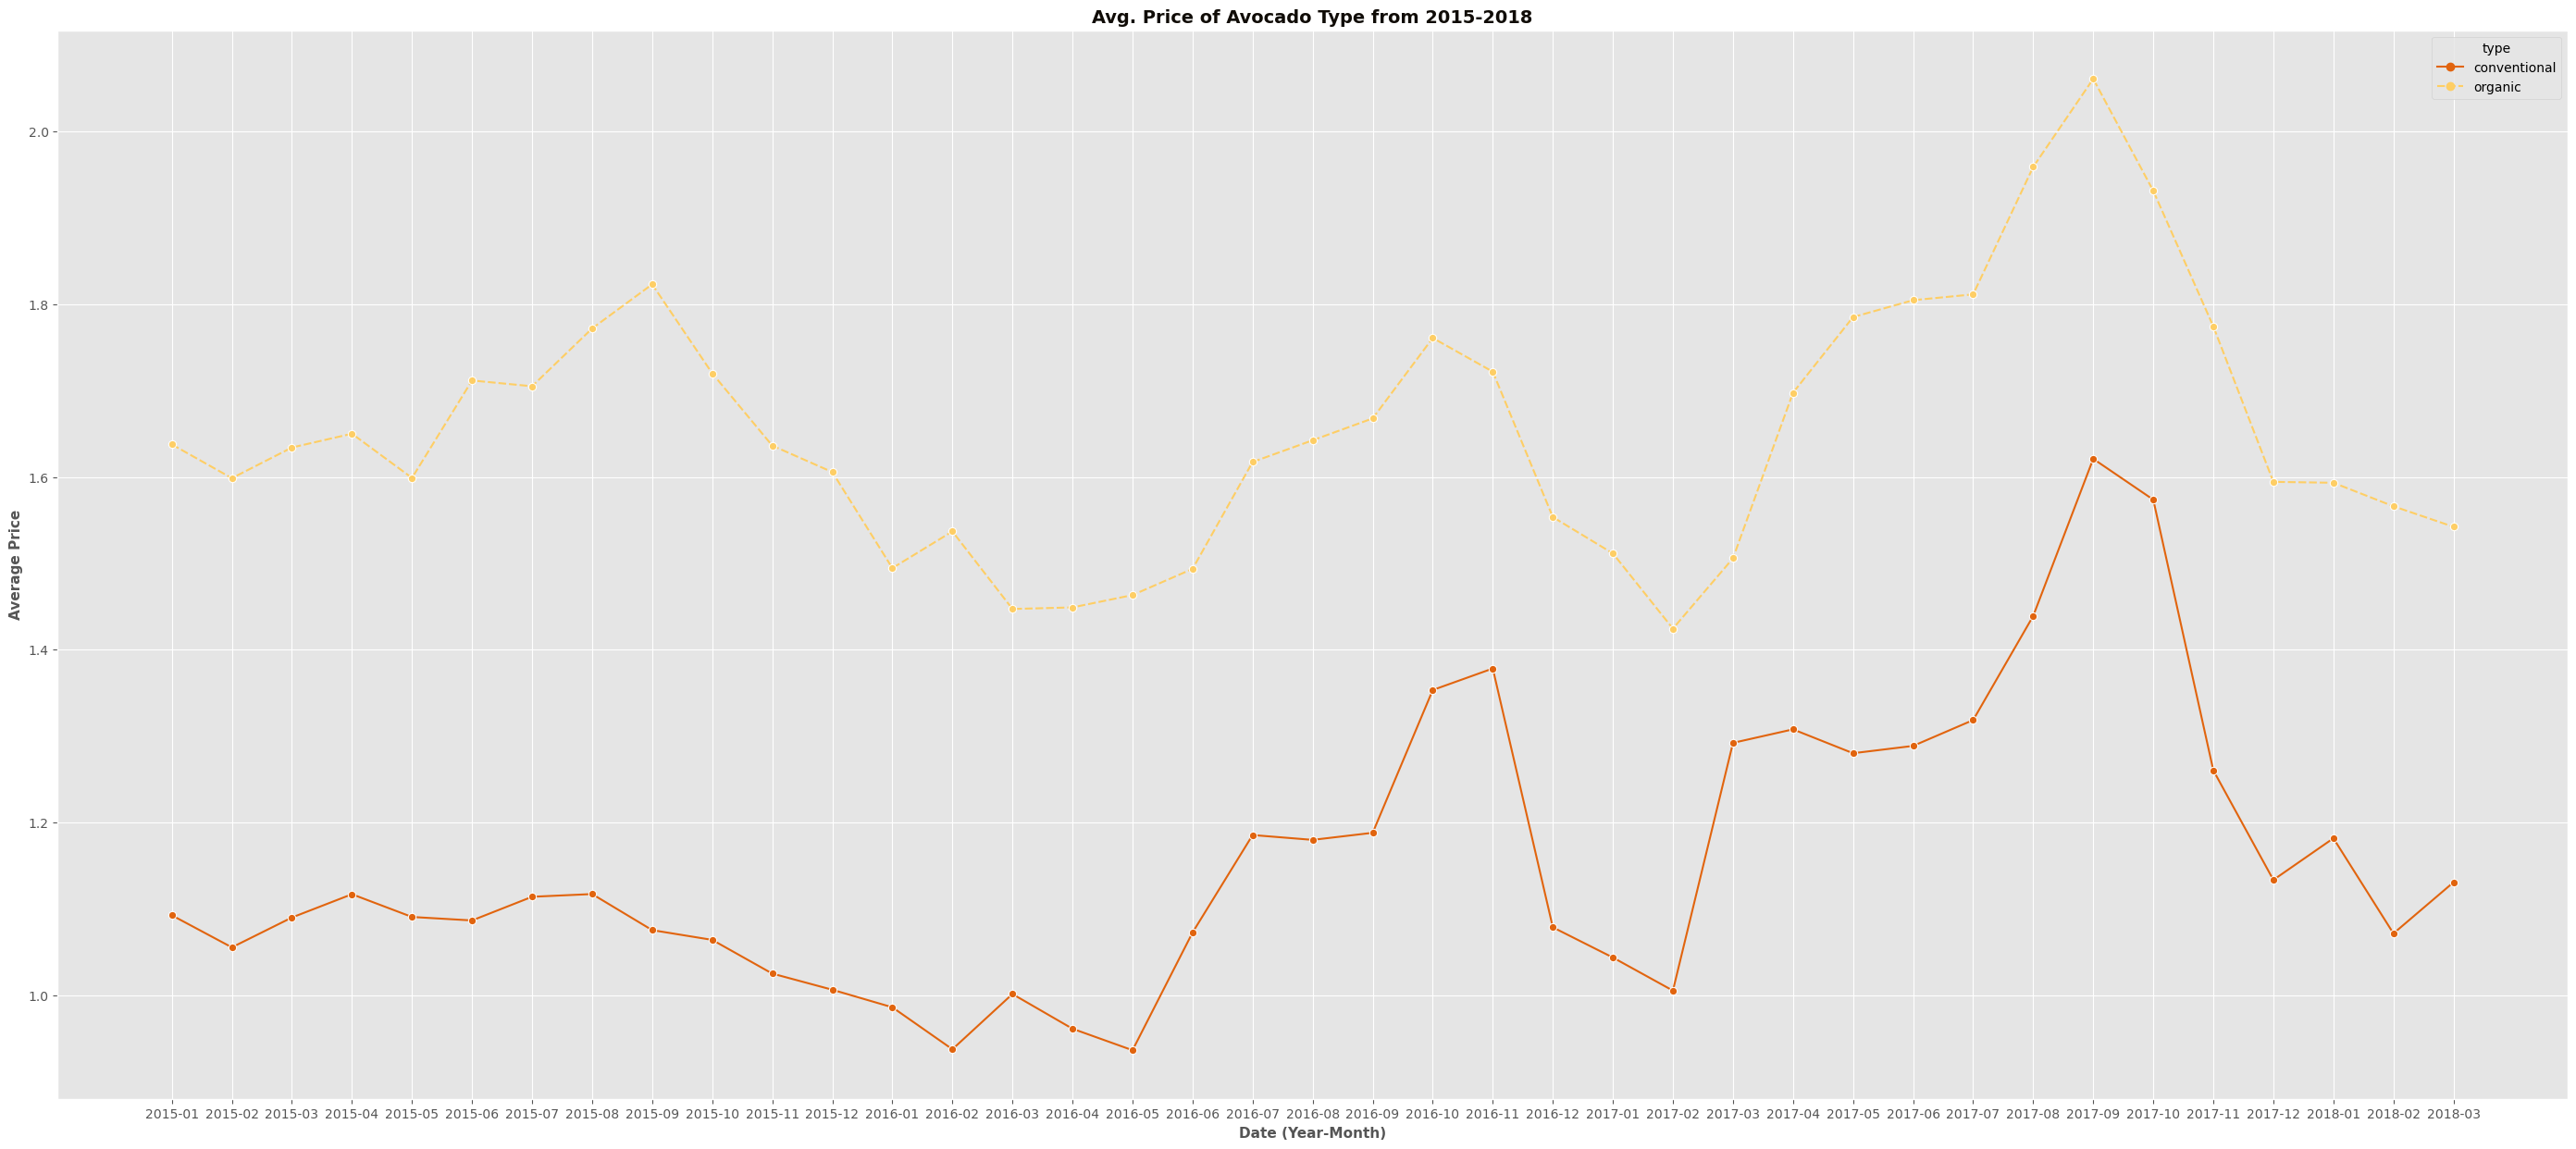

In [ ]:
# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize = (35, 15))
plt.title('Avg. Price of Avocado Type from 2015-2018', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif',
          color = black_grad[0])
sns.lineplot(data = time_ser_grp_month2, x = 'Date', y = 'AveragePrice', hue = 'type', style = 'type', markers = ['o', 'o'],
             palette = 'YlOrBr_r', alpha = 1)
plt.xlabel('Date (Year-Month)', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.xticks(rotation = '90', fontsize = 7)
plt.yticks(fontsize = 7)
plt.grid(axis = 'y', alpha = 0.5, lw = 0.6)
plt.grid(axis = 'x', alpha = 0)
plt.legend(labels = ['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8,
           loc = 'upper left', frameon = True)

As previously mentioned in previous section, organic avocados are more expensive compared to convetional avocados.

 It also can be seen that the avocado price fluctuations for both types are similar.

 In further analysis, the price of organic avocados always reached its peak between August-September for past 3 years (2015-2017). Different case with conventional avocados which doesn't have seasonality.
 
 The highest price of organic and conventional avocados were on September 2017. However, in the next month the prices for both types declined.

Corrrelation

Text(0.5, 1.0, 'Correlation Map of Numerical Variables')

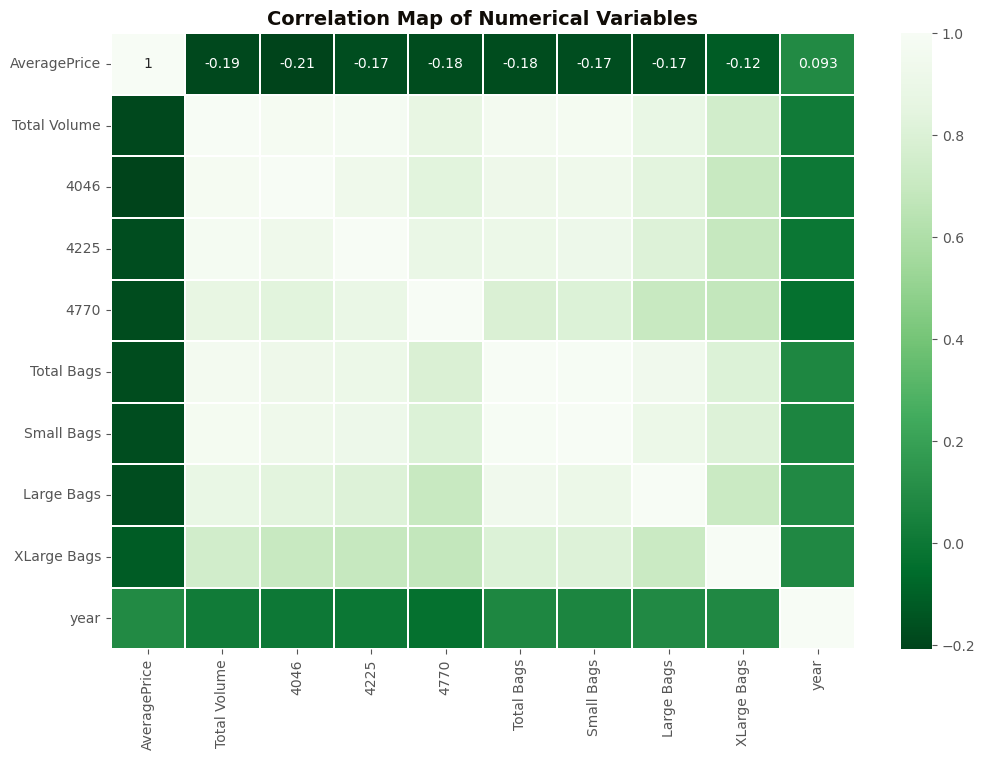

In [ ]:
num_features = data._get_numeric_data().columns.tolist()
plt.figure(figsize = (12, 8))
sns.heatmap(data[num_features].corr(), annot = True, cmap = 'Greens_r', linewidths = 0.1)
plt.title('Correlation Map of Numerical Variables', fontsize = 14, fontweight = 'bold', fontfamily = 'sans-serif',
          color = black_grad[0])

Based on EDAs above, it can be concluded that:

Conventional avocados have the lowest price and the most sales with little difference. Meanwhile, organic avocados have high prices and the least sales with a significant price difference. People are more likely to choose conventional avocados because they are cheap.

From the time series plot of avocado prices, the lowest prices for conventional avocados fell in February and May 2016 and February 2017. 

Meanwhile, in the time series plots of avocado sales, sales of conventional & organic avocados increased dramatically in those months. It can be concluded that the best time to sell conventional avocado is from the end of the year to the beginning (February).

The price of organic avocado follows the price of conventional avocado, but it does not affect the total sales of avocado, which is relatively the same every month.

In 2017, the average avocado price for both avocado types became the most expensive compared to the previous and following years.

West and California had the highest avocado sales rates for both types, followed by South Central and North East.

The highest prices for both avocado types are in the Springfield, New York, and San Francisco regions.

Avocado with PLU 4046 and 4225 had the highest average number of avocados compared to avocado with PLU 4770. In addition, small avocado bags had the highest average number compared to other avocado bags.

The higher the whole avocado sold, the more avocado bags available. This is indicated by heteroscedasticity between the total volume and total bags in the scatter plot. In addition, the high correlation value in the correlation map also indicates a reasonably high correlation between these two variables.

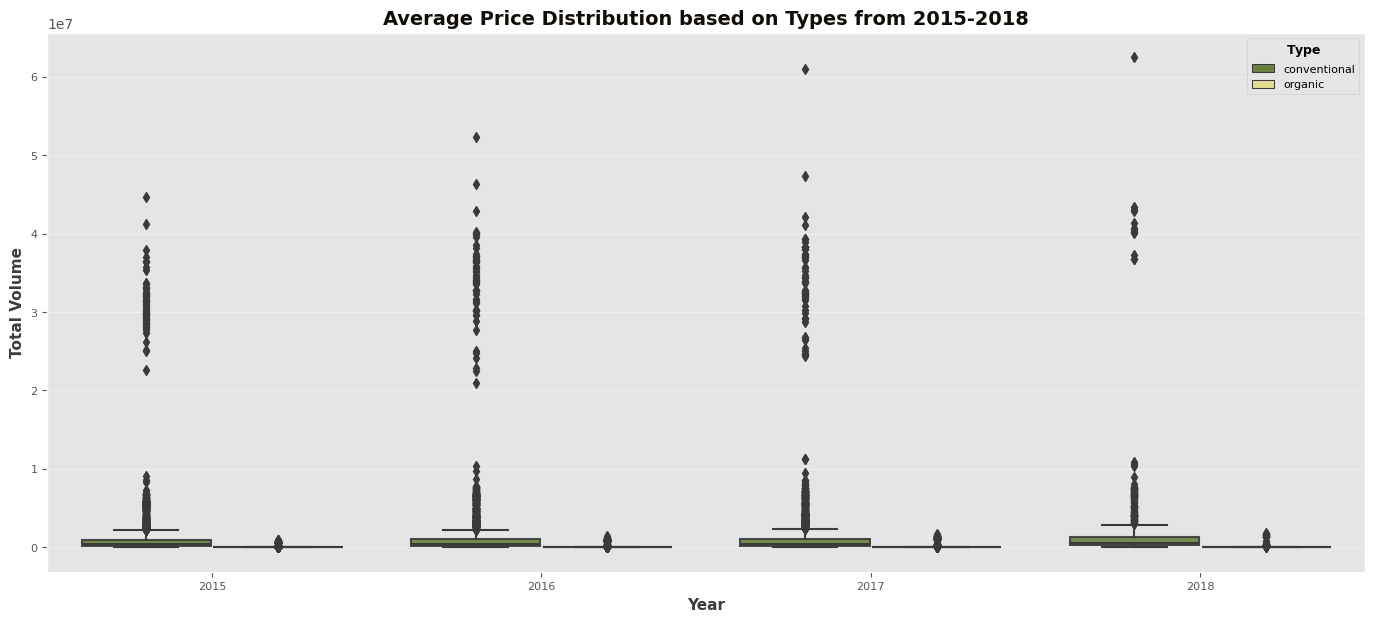

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'Total Volume', hue = 'type', data = data, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()

In [27]:
avo = data.copy()

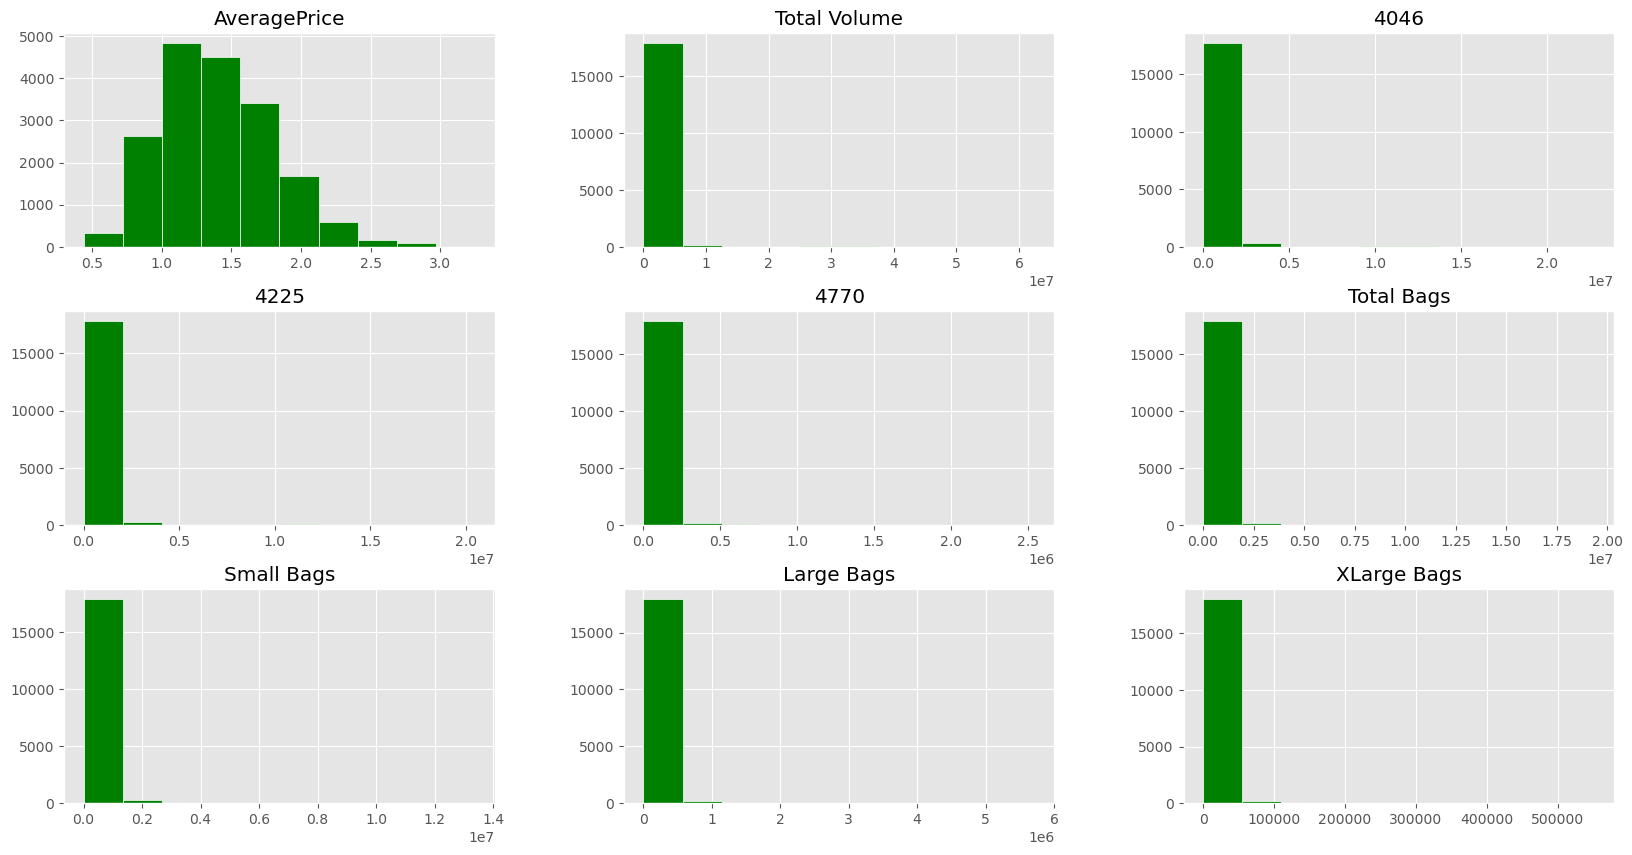

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [28]:
numbers = list(avo.select_dtypes(['float64', 'int64']).keys())

# removing years
numbers.remove('year')

avo[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

display(avo[numbers].describe())

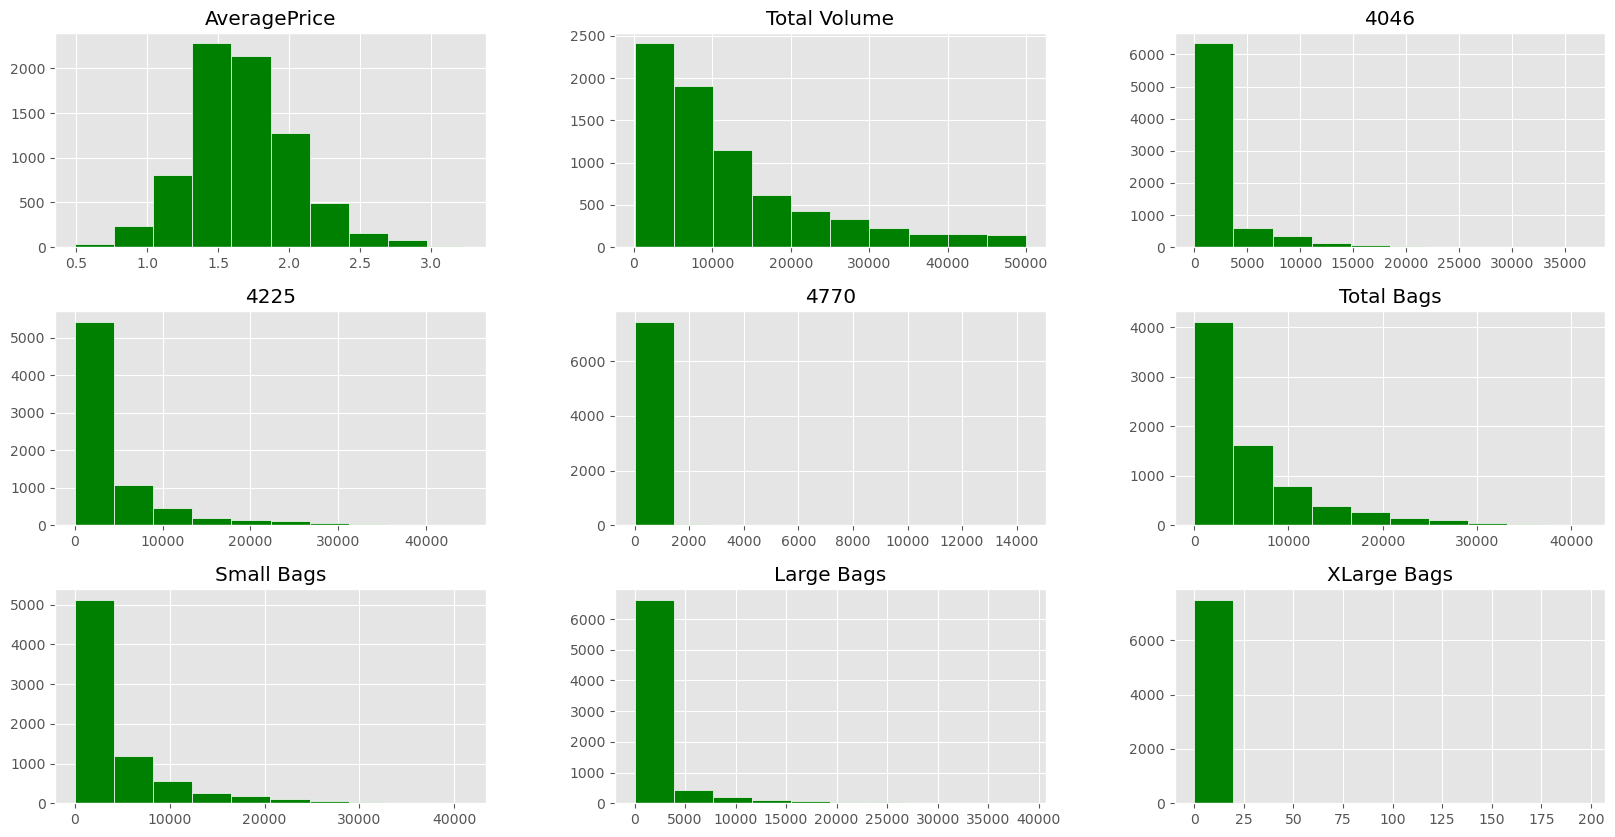

In [29]:
avo_o = avo[avo['Total Volume']<50000]
avo_o[numbers].hist(figsize=(20,10), color='green', edgecolor='white')

plt.show()

<Axes: >

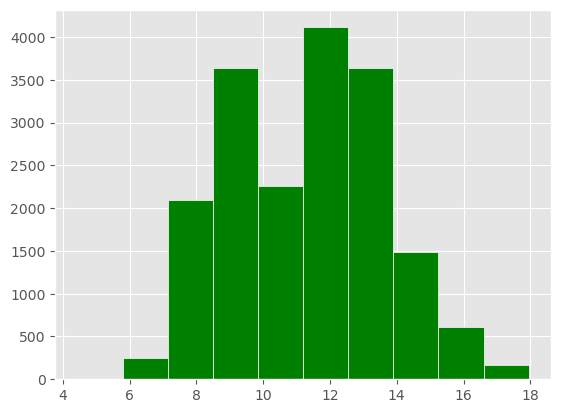

In [30]:
TotalLog = np.log(avo['Total Volume'] + 1)
TotalLog.hist(color='green', edgecolor='white')

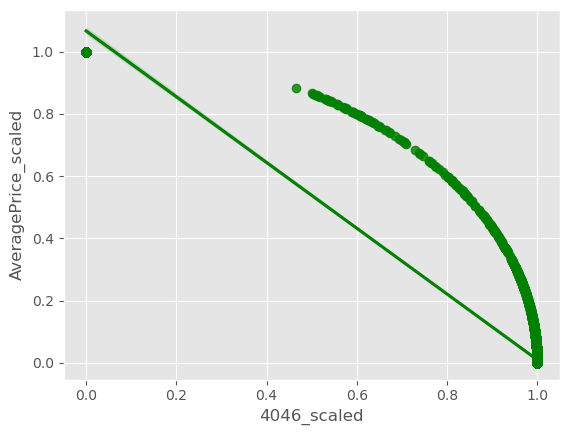

In [46]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(avo[['4046', 'AveragePrice']].values)
avo['4046_scaled'] = scaler.transform(avo[['4046', 'AveragePrice']].values)[:,0]
avo['AveragePrice_scaled'] = scaler.transform(avo[['4046', 'AveragePrice']].values)[:,1]

sns.regplot(x='4046_scaled', y='AveragePrice_scaled', data=avo, color='g')
plt.show()